# Demonstrating the extraction protocol

In [23]:
from pyqsp import *
from pyqsp.gadgets import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [24]:
ExtractionSequence().generate(12)

[-7.46401256e-25 -4.43090927e-23 -1.04555629e-21 -1.48230766e-20
 -1.62630326e-19 -1.32814766e-18 -7.26415456e-18 -2.94902991e-17
 -8.50014503e-17 -1.90819582e-16 -3.46944695e-16 -4.75314232e-16
 -4.44089210e-16  1.00000000e+00 -4.44089210e-16 -4.75314232e-16
 -3.46944695e-16 -1.90819582e-16 -8.50014503e-17 -2.94902991e-17
 -7.26415456e-18 -1.32814766e-18 -1.62630326e-19 -1.48230766e-20
 -1.04555629e-21 -4.43090927e-23 -7.46401256e-25]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


[5.637712519046543e-13,
 -1.408592780667613,
 0.35734524307931714,
 -1.1345184269740547,
 0.6993724417367266,
 2.0597542064002714,
 -1.8996421256240206,
 1.241950527964743,
 -1.0818384471894473,
 0.6993724417368792,
 -1.1345184269744728,
 0.3573452430800286,
 -1.408592780667633,
 3.3795188869589765e-13]

In [25]:
L = 5 # Length of gadget sequence
deg = 20 # Degree of extraction

# Constructs an atomic gadget
#Xi_1 = np.array([[np.random.uniform() for _ in range(L)], [np.random.uniform() for _ in range(L)]])
#S_1 = [[np.random.choice([0, 1]) for _ in range(L-1)], [np.random.choice([0, 1]) for _ in range(L-1)]]

#Xi_1 = np.array([[np.pi/3, np.pi/2, 0, -0, -np.pi/2, -np.pi/3]])
Xi_1 = [np.array([0, 1, 2, -2, 1, 0])]
S_1 = [[0, 1, 0, 1, 0]]
G = AtomicGadget(Xi_1, S_1, label="G")

Xi_2 = np.array([[np.pi/3, np.pi/2, 0, -0, -np.pi/2, -np.pi/3]])
S_2 = [[0, 1, 0, 1, 0]]
G_tilde = AtomicGadget(Xi_2, S_2, label="G_tilde")

In [26]:
G_extract = ExtractionGadget(deg, label="G_ex") # Extraction gadget

[-2.22391946e-30  9.07125041e-29  5.25065819e-27  0.00000000e+00
 -5.16987883e-24 -1.55509955e-22 -2.42198483e-21 -2.32404665e-20
 -1.34360601e-19 -2.52415818e-19  3.25938278e-18  3.79470760e-17
  2.29335865e-16  9.74203086e-16  3.17909761e-15  8.29458030e-15
  1.77045878e-14  3.15719673e-14  4.85167462e-14  6.57529586e-14
  7.95474797e-14  1.00000000e+00  7.95474797e-14  6.57529586e-14
  4.85167462e-14  3.15719673e-14  1.77045878e-14  8.29458030e-15
  3.17909761e-15  9.74203086e-16  2.29335865e-16  3.79470760e-17
  3.25938278e-18 -2.52415818e-19 -1.34360601e-19 -2.32404665e-20
 -2.42198483e-21 -1.55509955e-22 -5.16987883e-24  0.00000000e+00
  5.25065819e-27  9.07125041e-29 -2.22391946e-30]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
# G input and output legs
print("In legs = {}".format(G.in_labels))
print("Out legs = {}".format(G.out_labels))

print("---------------")

# G_extract input and output legs
print("In legs = {}".format(G_extract.in_labels))
print("Out legs = {}".format(G_extract.out_labels))

In legs = [('G', 0), ('G', 1)]
Out legs = [('G', 0)]
---------------
In legs = [('G_ex', 0)]
Out legs = [('G_ex', 0)]


In [28]:
# Performs an interlink of the G gadget with the extraction gadget
G_prime = G.interlink(
    G_extract, 
    [(('G', 0), ('G_ex', 0), None)
])

In [29]:
G_prime.get_sequence(('G_ex', 0))

hi
[0, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, -1, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2

([0,
  1,
  2,
  -2,
  1,
  -1,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  1,
  1,
  2,
  -2,
  1,
  -2,
  1,
  2,
  -2,
  1,
  2,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  -1,
  1,
  2,
  -2,
  1,
  -1,
  1,
  2,
  -2,
  1,
  1,
  1,
  2,
  -2,
  1,
  -1,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  2,
  1,
  2,
  -2,
  1,
  -2,
  1,
  2,
  -2,
  1,
  1,
  1,
  2,
  -2,
  1,
  0,
  1,
  2,
  -2,
  1,
  -1,
  1,
  2,
  -2,
  1,
  3],
 [('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 1),
  ('G', 0),
  ('G', 0),
  ('G', 1

In [30]:
print("In legs = {}".format(G_prime.in_labels))
print("Out legs = {}".format(G_prime.out_labels))

In legs = [('G', 0), ('G', 1)]
Out legs = [('G_ex', 0)]


In [31]:
U = G_prime.get_qsp_unitary(('G_ex', 0)) # Gets the corresponding QSP unitary

In [32]:
# Demonstrates that the extraction protocol has succeeded
P = lambda x, y : U({('G', 0): x, ('G', 1): y})[0][0] # QSP polynomial

In [33]:
P(0.1, 0.2)

hi
[0, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2, -2, 1, -2, 1, 2, -2, 1, 2, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, 0, 1, 2, -2, 1, -1, 1, 2, -2, 1, -1]
[0, 1, 2, -2, 1, -1, 1, 2, -2, 1, 0, 1, 2, -2, 1, 1, 1, 2

(-0.05949687040625881-0.26262116726767243j)

In [34]:
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

Vals = []
for i in tqdm(range(len(Y))):
    K = []
    for j in range(len(Y)):
        K.append(P(X[i][j], Y[i][j]))
    Vals.append(K)
    
plt.matshow(np.real(Vals))
plt.colorbar()

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

  0%|          | 0/100 [00:00<?, ?it/s]

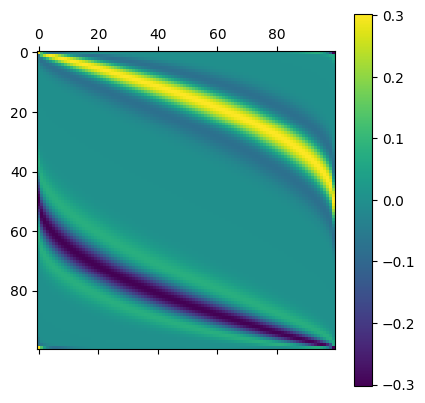

In [78]:
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

Vals = []
for i in tqdm(range(len(Y))):
    K = []
    for j in range(len(Y)):
        K.append(P(X[i][j], Y[i][j]))
    Vals.append(K)
    
plt.matshow(np.real(Vals))
plt.colorbar()